# Fluctuaciones térmicas

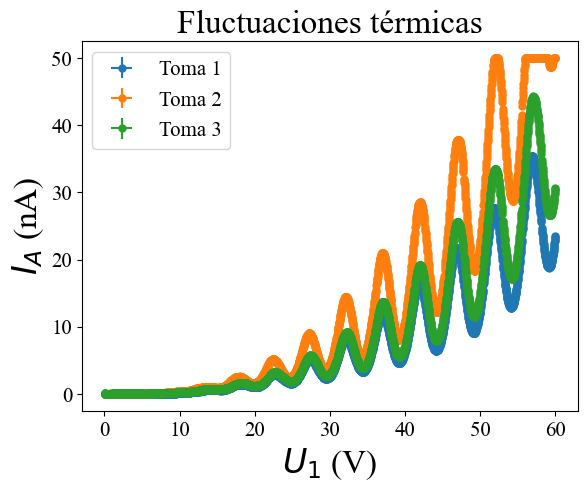

In [56]:
import csv
import matplotlib.pyplot as plt

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Times New Roman')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=';')
        next(lector_csv)  # Saltar la primera fila (encabezados de columna)
        for fila in lector_csv:
            # Suponiendo que la primera columna contiene números y la segunda también contiene números
            columna1.append(float(fila[0].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
            columna2.append(float(fila[1].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
    return columna1, columna2

# Función para crear un gráfico de dispersión con barras de error
def crear_grafico(columna1, columna2, etiqueta):
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5)

# Lista de nombres de archivos CSV
archivos_csv = ['A_2_1_toma1.csv', 'A_2_1_toma2.csv', 'A_2_1_toma3.csv']

# Leer los archivos CSV y crear gráficos para cada uno
for indice, archivo in enumerate(archivos_csv, start=1):
    columna1, columna2 = leer_csv(archivo)
    etiqueta = f'Toma {indice}'  # Etiqueta personalizada con el número de toma
    crear_grafico(columna1, columna2, etiqueta)

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=24)
plt.ylabel(r'$I_A$ (nA)', fontsize=24)
plt.title('Fluctuaciones térmicas', fontsize=24)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15)
plt.show()


# $I_A$ vs $U_1$ con $U_2$ y $U_H$ constante y variando $T$

Mínimos en 170 °C.csv (en el rango de 24 a 50):
x: 29.37, y: 4.25
x: 34.18, y: 6.48
x: 39.19, y: 10.17
x: 44.29, y: 16.03
x: 49.23, y: 26.28
Mínimos en 175 °C.csv (en el rango de 24 a 50):
x: 29.45, y: 2.25
x: 39.31, y: 4.62
x: 44.15, y: 6.44
x: 49.13, y: 9.02
Mínimos en 185 °C.csv (en el rango de 24 a 50):
x: 24.61, y: 2.0
x: 29.4, y: 2.84
x: 34.23, y: 4.13
x: 39.04, y: 5.9
x: 44.1, y: 8.52
x: 49.05, y: 12.43


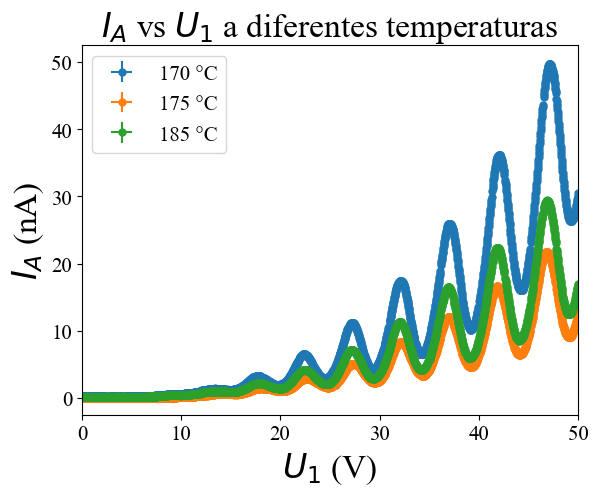

In [113]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Times New Roman')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=';')
        next(lector_csv)  # Saltar la primera fila (encabezados de columna)
        for fila in lector_csv:
            # Suponiendo que la primera columna contiene números y la segunda también contiene números
            columna1.append(float(fila[0].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
            columna2.append(float(fila[1].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
    return columna1, columna2

# Lista de nombres de archivos CSV
archivos_csv = ['170 °C.csv', '175 °C.csv', '185 °C.csv']

# Rango de valores en x de 24 a 50
rango_inicio = 24
rango_fin = 50

# Leer los archivos CSV y crear gráficos para cada uno
for archivo in archivos_csv:
    columna1, columna2 = leer_csv(archivo)
    etiqueta = archivo.split('.')[0]  # Usar el nombre del archivo sin extensión como etiqueta
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5)
    
    # Filtrar los datos en el rango de interés (24 a 50 en x)
    indices_rango = np.where((np.array(columna1) >= rango_inicio) & (np.array(columna1) <= rango_fin))[0]
    columna1_rango = np.array(columna1)[indices_rango]
    columna2_rango = np.array(columna2)[indices_rango]
    
    # Encontrar los mínimos locales más prominentes en el rango especificado
    minimos_locales_indices = argrelextrema(columna2_rango, np.less, order=10)[0]
    minimos_locales_x = [columna1_rango[i] for i in minimos_locales_indices]
    minimos_locales_y = [columna2_rango[i] for i in minimos_locales_indices]
    
    # Mostrar los valores de los mínimos en la consola
    print(f'Mínimos en {archivo} (en el rango de {rango_inicio} a {rango_fin}):')
    for x, y in zip(minimos_locales_x, minimos_locales_y):
        print(f'x: {x}, y: {y}')

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=24)
plt.ylabel(r'$I_A$ (nA)', fontsize=24)
plt.xlim(0, rango_fin)  # Establecer el límite en el eje x
plt.title(r'$I_A$ vs $U_1$ a diferentes temperaturas', fontsize=24)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15)
plt.show()


Variando los parámetros de este codigo se pueden encontrar todos los mínimos.

In [143]:
#mínimos

T_170 = [29.37, 34.18, 39.19, 44.29, 49.23] #V
T_175 = [29.45, 34.38, 39.31, 44.15, 49.13] #V
T_185 = [29.40, 34.23, 39.04, 44.10, 49.05] #V

In [138]:
import sympy as sp

def propagacion_de_error(expr, variables, errores):
    """
    Calcula el error propagado para una expresión dada utilizando el método de derivadas parciales.

    Parámetros:
        expr (str): La expresión matemática en forma de cadena.
        variables (list): Lista de símbolos de las variables en la expresión.
        errores (list): Lista de los errores asociados a cada variable.

    Retorna:
        float: Expreseion del del error propagado.
    """
    # Convertir las cadenas a símbolos de sympy
    symbols = sp.symbols(variables)
    expr = sp.sympify(expr)
    
    # Calcular el error propagado utilizando derivadas parciales
    derivadas = [sp.diff(expr, var) for var in symbols]
    error_propagado = sp.sqrt(sum([(derivada * error)**2 for derivada, error in zip(derivadas, errores)]))
    
    return error_propagado.evalf()

In [139]:

#incertidumbre entre mínimos

di = 0.01
df = 0.01

pre_prop_dE = "f - i"
var_dE = ['f', 'i']
errs_dE = [df, di]
prop_dE = propagacion_de_error(pre_prop_dE, var_dE, errs_dE)

prop_dE

0.0141421356237310

In [144]:
#distancia entre los primeros mínimos de 170 °C

Ei = round(T_170[1] - T_170[0] , 2)
dEi = round(0.01414,2)

print(f"La distancía entre los primeros mínimos es de {Ei} ± {dEi} eV")
print(" ")

#distancia entre los ultimos mínimos de 170 °C
Ef = round(T_170[-1] - T_170[-2] , 2)
dEf = round(0.01414,2)

print(f"La distancía entre los ultimos mínimos es de {Ef} ± {dEf} eV")
print(" ")

La distancía entre los primeros mínimos es de 4.81 ± 0.01 eV
 
La distancía entre los ultimos mínimos es de 4.94 ± 0.01 eV
 


In [141]:
#distancia entre los primeros mínimos de 175 °C

Ei = round(T_175[1] - T_175[0] , 2)
dEi = round(0.01414,2)

print(f"La distancía entre los primeros mínimos es de {Ei} ± {dEi} eV")
print(" ")

#distancia entre los ultimos mínimos de 175 °C
Ef = round(T_175[-1] - T_175[-2] , 2)
dEf = round(0.01414,2)

print(f"La distancía entre los ultimos mínimos es de {Ef} ± {dEf} eV")
print(" ")

La distancía entre los primeros mínimos es de 4.93 ± 0.01 eV
 
La distancía entre los ultimos mínimos es de 4.98 ± 0.01 eV
 


In [142]:
#distancia entre los primeros mínimos de 185 °C

Ei = round(T_185[1] - T_185[0] , 2)
dEi = round(0.01414,2)

print(f"La distancía entre los primeros mínimos es de {Ei} ± {dEi} eV")
print(" ")

#distancia entre los ultimos mínimos de 175 °C
Ef = round(T_185[-1] - T_185[-2] , 2)
dEf = round(0.01414,2)

print(f"La distancía entre los ultimos mínimos es de {Ef} ± {dEf} eV")
print(" ")

La distancía entre los primeros mínimos es de 4.83 ± 0.01 eV
 
La distancía entre los ultimos mínimos es de 4.95 ± 0.01 eV
 


# $I_A$ vs $U_1$ con $T$ y $U_H$ constante y variando $U_2$

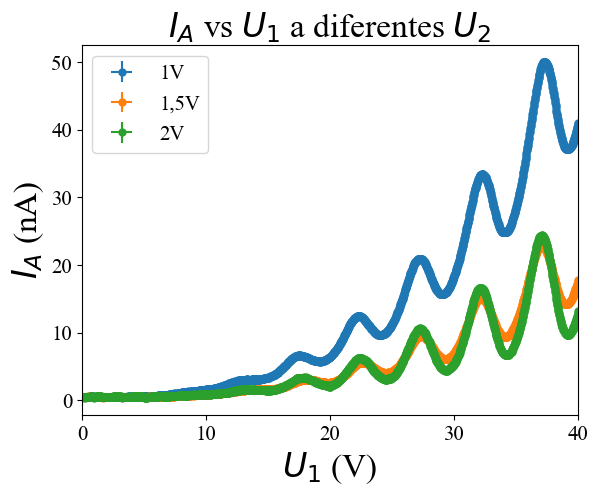

In [192]:
import csv
import matplotlib.pyplot as plt

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Times New Roman')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=';')
        next(lector_csv)  # Saltar la primera fila (encabezados de columna)
        for fila in lector_csv:
            # Suponiendo que la primera columna contiene números y la segunda también contiene números
            columna1.append(float(fila[0].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
            columna2.append(float(fila[1].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
    return columna1, columna2

# Función para crear un gráfico de dispersión con barras de error
def crear_grafico(columna1, columna2, etiqueta):
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5)

# Lista de nombres de archivos CSV
archivos_csv = ['1V.csv', '1,5V.csv', '2V.csv']

# Leer los archivos CSV y crear gráficos para cada uno
for archivo in archivos_csv:
    columna1, columna2 = leer_csv(archivo)
    etiqueta = archivo.split('.')[0]  # Usar el nombre del archivo sin extensión como etiqueta
    crear_grafico(columna1, columna2, etiqueta)

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=24)
plt.ylabel(r'$I_A$ (nA)', fontsize=24)
plt.xlim(0,40)
plt.title(r'$I_A$ vs $U_1$ a diferentes $U_2$', fontsize=24)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15)
plt.show()

# $I_A$ vs $U_1$ con $T$ y $U_2$ constante y variando $U_H$

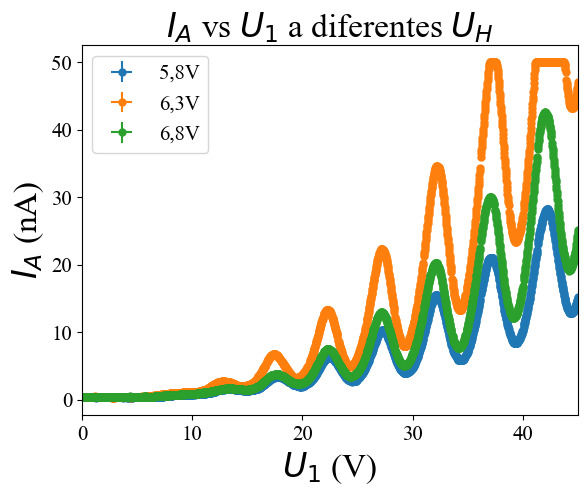

In [195]:
import csv
import matplotlib.pyplot as plt

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Times New Roman')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=';')
        next(lector_csv)  # Saltar la primera fila (encabezados de columna)
        for fila in lector_csv:
            # Suponiendo que la primera columna contiene números y la segunda también contiene números
            columna1.append(float(fila[0].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
            columna2.append(float(fila[1].replace(',', '.')))  # Reemplazar ',' con '.' y convertir a float
    return columna1, columna2

# Función para crear un gráfico de dispersión con barras de error
def crear_grafico(columna1, columna2, etiqueta):
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5)

# Lista de nombres de archivos CSV
archivos_csv = ['5,8V.csv', '6,3V.csv', '6,8V.csv']

# Leer los archivos CSV y crear gráficos para cada uno
for archivo in archivos_csv:
    columna1, columna2 = leer_csv(archivo)
    etiqueta = archivo.split('.')[0]  # Usar el nombre del archivo sin extensión como etiqueta
    crear_grafico(columna1, columna2, etiqueta)

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=24)
plt.ylabel(r'$I_A$ (nA)', fontsize=24)
plt.xlim(0,45)
plt.title(r'$I_A$ vs $U_1$ a diferentes $U_H$', fontsize=24)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15)
plt.show()